# 1. Install Dependencies and Setup

In [55]:
import tensorflow as tf
import os
from sklearn import metrics

# 2. Remove dodgy images

In [56]:
import cv2
import imghdr

In [57]:
# data_dir = 'data' 

train_dir = 'data/Train/'
test_dir = 'data/Test/'

In [58]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [59]:
for image_class in os.listdir(train_dir): 
    for image in os.listdir(os.path.join(train_dir, image_class)):
        image_path = os.path.join(train_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            # tip = imghdr.what(image_path)
            # if tip not in image_exts: 
            #     print('Image not in ext list {}'.format(image_path))
            #     os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [60]:
for image_class in os.listdir(test_dir): 
    for image in os.listdir(os.path.join(test_dir, image_class)):
        image_path = os.path.join(test_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            # tip = imghdr.what(image_path)
            # if tip not in image_exts: 
            #     print('Image not in ext list {}'.format(image_path))
            #     os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [61]:
import numpy as np
from matplotlib import pyplot as plt

In [62]:
# data = tf.keras.utils.image_dataset_from_directory('data') changed from relative path to variable
total_train_data = tf.keras.utils.image_dataset_from_directory(train_dir, batch_size=382)
train_data = tf.keras.utils.image_dataset_from_directory(train_dir)

Found 382 files belonging to 4 classes.
Found 382 files belonging to 4 classes.


In [63]:
print (image_path)

data/Test/Rot_Apple/Rot_Apple11.jpg


In [64]:
print (train_data.class_names)

['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']


In [65]:
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, batch_size=120)

Found 120 files belonging to 4 classes.


In [66]:
# data_iterator = data.as_numpy_iterator()
train_iterator = train_data.as_numpy_iterator()

In [67]:
test_iterator = test_data.as_numpy_iterator()

In [68]:
# batch = data_iterator.next()
train_batch = train_iterator.next()

In [69]:
test_batch = test_iterator.next()

VISUALISE TRAIN AND TEST DATA

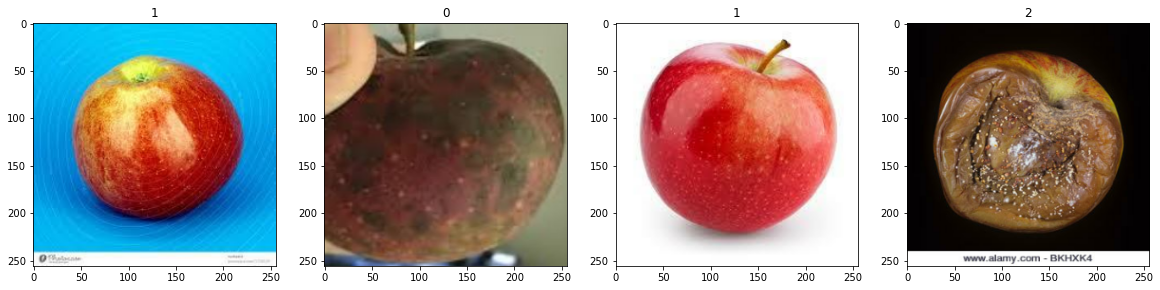

In [70]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(train_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])

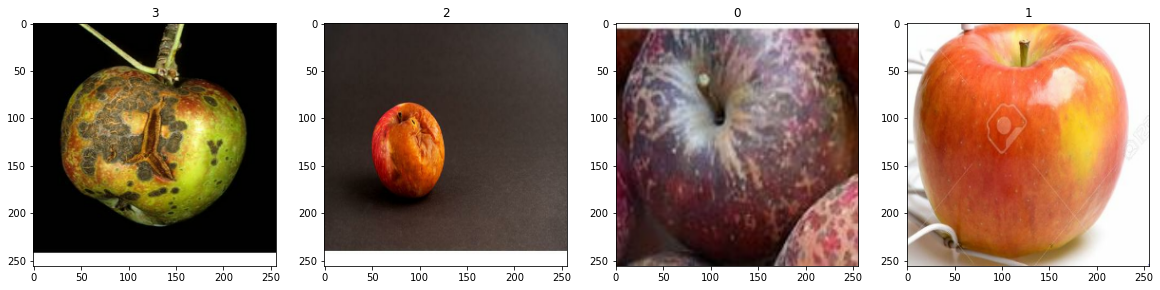

In [71]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(test_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(test_batch[1][idx])

# 4. Scale Data

In [72]:
train_data = train_data.map(lambda x,y: (x/255, y))

In [73]:
test_data = test_data.map(lambda x,y: (x/255, y))

In [74]:
train_data.as_numpy_iterator().next()

(array([[[[4.70519304e-01, 6.19538903e-01, 2.94048727e-01],
          [4.57858443e-01, 6.06878042e-01, 2.81250000e-01],
          [4.05070454e-01, 5.54090083e-01, 2.20756739e-01],
          ...,
          [3.27098638e-01, 4.95840997e-01, 1.85117960e-01],
          [3.25490206e-01, 4.90265012e-01, 1.92019001e-01],
          [3.25490206e-01, 4.90196079e-01, 1.92156866e-01]],
 
         [[4.18317735e-01, 5.67337334e-01, 2.41817877e-01],
          [4.46119934e-01, 5.95139563e-01, 2.64605373e-01],
          [4.35253173e-01, 5.84272802e-01, 2.50793129e-01],
          ...,
          [3.41568202e-01, 5.10310531e-01, 1.97163716e-01],
          [3.40471804e-01, 5.05246639e-01, 2.06956714e-01],
          [3.40471804e-01, 5.05177677e-01, 2.07138479e-01]],
 
         [[3.99318963e-01, 5.48338532e-01, 2.19708040e-01],
          [4.42326486e-01, 5.91346025e-01, 2.54918396e-01],
          [4.44602072e-01, 5.93667030e-01, 2.57009536e-01],
          ...,
          [3.61838669e-01, 5.30580997e-01, 2.1605

In [75]:
test_data.as_numpy_iterator().next()

(array([[[[0.24610907, 0.26534927, 0.10174632],
          [0.2901961 , 0.2969516 , 0.12447917],
          [0.32579657, 0.3180913 , 0.12527573],
          ...,
          [0.14578737, 0.1604473 , 0.04747242],
          [0.0997549 , 0.10752144, 0.02216605],
          [0.07461704, 0.07950368, 0.00686275]],
 
         [[0.20965074, 0.21671262, 0.05695466],
          [0.26698837, 0.26919425, 0.09748775],
          [0.32461703, 0.31066176, 0.11983762],
          ...,
          [0.12463235, 0.13725491, 0.03333334],
          [0.07377451, 0.0810049 , 0.00413603],
          [0.05110294, 0.05502451, 0.        ]],
 
         [[0.19103861, 0.18760723, 0.03098958],
          [0.27166054, 0.26367953, 0.09480698],
          [0.35012254, 0.32345283, 0.13653493],
          ...,
          [0.09767157, 0.10929841, 0.01671262],
          [0.04964767, 0.05481005, 0.        ],
          [0.02904412, 0.03296569, 0.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

# 5. Split Data

In [76]:
train_size = int(len(train_data)*.8)
val_size = int(len(train_data)*.2)
test_size = int(len(test_data))

In [77]:
train_size

9

In [78]:
val_size

2

In [79]:
test_size

1

In [80]:
train = train_data.take(train_size)
val = train_data.skip(train_size).take(val_size)
test = test_data.take(test_size)

# 6. Build Deep Learning Model

In [81]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow import keras

In [83]:
model = Sequential()

In [84]:
# Define a simple sequential model
num_classes = 4
# lossFunction = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# gdAlgorithm = keras.optimizers.Adam(learning_rate=0.001)
# nrOfEpochs = 5
img_height = 256
img_width = 256
image_size=(img_height, img_width)
batch_size = 32


def create_model():
  model = tf.keras.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense((num_classes),activation='softmax')
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)       

# 7. Train

In [85]:
logdir='logs'

In [86]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [87]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 7s 759ms/step - loss: 1.3862 - sparse_categorical_accuracy: 0.2535 - val_loss: 1.3805 - val_sparse_categorical_accuracy: 0.2656
Epoch 2/20
9/9 [==============================] - 7s 737ms/step - loss: 1.3713 - sparse_categorical_accuracy: 0.2951 - val_loss: 1.3523 - val_sparse_categorical_accuracy: 0.3125
Epoch 3/20
9/9 [==============================] - 7s 747ms/step - loss: 1.3714 - sparse_categorical_accuracy: 0.2882 - val_loss: 1.3903 - val_sparse_categorical_accuracy: 0.2656
Epoch 4/20
9/9 [==============================] - 7s 745ms/step - loss: 1.3557 - sparse_categorical_accuracy: 0.2986 - val_loss: 1.4164 - val_sparse_categorical_accuracy: 0.2656
Epoch 5/20
9/9 [==============================] - 7s 744ms/step - loss: 1.3643 - sparse_categorical_accuracy: 0.2917 - val_loss: 1.3167 - val_sparse_categorical_accuracy: 0.2969
Epoch 6/20
9/9 [==============================] - 7s 742ms/step - loss: 1.3624 - sparse_categorical_accuracy: 

# 8. Plot Performance

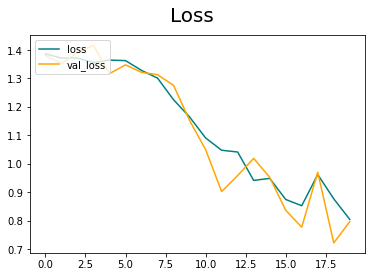

In [88]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [89]:
print(hist.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


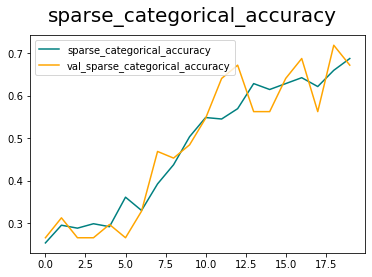

In [90]:
fig = plt.figure()
plt.plot(hist.history['sparse_categorical_accuracy'], color='teal', label='sparse_categorical_accuracy')
plt.plot(hist.history['val_sparse_categorical_accuracy'], color='orange', label='val_sparse_categorical_accuracy')
fig.suptitle('sparse_categorical_accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [91]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [92]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [93]:
len(test)

1

In [94]:
for test_batch in test_data.as_numpy_iterator(): 
    X, y = test_batch
    yhat = model.predict(X)
    pred = np.argmax(yhat, axis=-1)
    # pre.update_state(y, yhat)
    # re.update_state(y, yhat)
    # acc.update_state(y, yhat)

    print (pred)
    print (y)

[0 1 1 0 1 2 0 0 2 2 0 0 0 0 0 1 0 3 2 0 2 3 2 0 0 2 0 2 0 0 0 0 0 1 2 0 3
 2 2 0 2 3 1 0 2 0 3 2 2 2 0 0 0 2 0 0 0 2 0 2 0 2 0 0 0 2 2 0 3 3 2 3 0 0
 3 2 0 0 2 0 2 0 0 0 2 2 0 0 2 3 2 2 0 0 2 0 0 0 2 0 2 2 3 0 2 3 0 0 3 0 2
 0 2 3 2 0 2 0 1 0]
[3 2 2 3 1 3 1 2 2 2 0 1 1 0 1 3 1 3 2 1 3 2 2 0 0 2 1 3 3 1 0 1 0 1 2 0 3
 1 2 3 2 2 1 0 2 3 0 2 2 2 0 0 3 2 1 0 1 1 0 2 3 2 0 3 1 0 2 3 0 3 1 3 0 1
 2 2 0 0 2 0 2 3 0 1 3 2 1 0 2 3 3 2 3 0 2 2 0 3 2 0 2 2 3 3 2 1 0 3 0 0 2
 0 2 0 2 1 2 3 1 3]


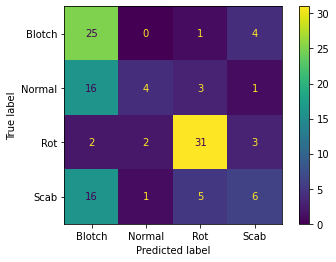

In [95]:

# plt.plot(history.history['accuracy'], label='Train accuracy')
# plt.plot(history_test.history['accuracy'], label = 'Test accuracy')

actual = y
predicted = pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Blotch', 'Normal', 'Rot', 'Scab'])

cm_display.plot()
plt.show()

In [109]:
testscore = model.evaluate(test_data)

1/1 [==============================] - 1s 1s/step - loss: 1.0776 - sparse_categorical_accuracy: 0.5500


In [96]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [97]:
import cv2

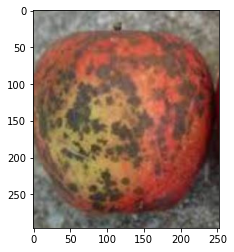

In [98]:
img = cv2.imread('data/Test/Blotch_Apple/Blotch_Apple1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

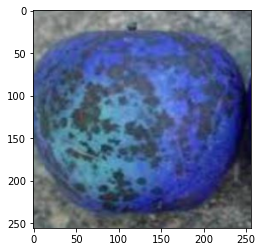

In [99]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [100]:
yhat = model.predict(np.expand_dims(resize/255, 0))
pred = np.argmax(yhat, axis=-1)

In [101]:
if pred == [3]: print ('the model predicts an apple with scab')
elif pred == [2]: print ('the model predicts an apple with rot')
elif pred == [1]: print ('the model predicts this is a normal healthy apple')
elif pred == [0]: print ('the model predicts this is a blotched apple')
else: print ('the model also has no idea what you put in')

the model predicts this is a blotched apple


if num > 0:
    print("Positive number")
elif num == 0:
    print("Zero")
else:
    print("Negative number")

# 11. Save the Model and test loading the Model

In [102]:
from tensorflow.keras.models import load_model

In [103]:
model.save(os.path.join('models','appleclassifier41.h5'))

In [104]:
new_model = load_model('models/appleclassifier41.h5')

In [105]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)       

In [106]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

In [107]:
pred_new = np.argmax(yhat_new, axis=-1)

In [108]:
if pred_new == [3]: print ('the model predicts an apple with scab')
elif pred_new == [2]: print ('the model predicts an apple with rot')
elif pred_new == [1]: print ('the model predicts this is a normal healthy apple')
elif pred_new == [0]: print ('the model predicts this is a blotched apple')
else: print ('the model also has no idea what you put in')

the model predicts this is a blotched apple


De vragen die ik bij 2_1 nog had zijn beantwoord door uitwerking 

Nieuwe vraag:

voor het aanmaken van de data moet ik soms onderstaand commando runnen bij foutmelding:

find . -name "*.DS_Store" -type f -delete

wat is dit?


Van to do 1_2 zijn confusion matrix en plots afgehandeld

new to do - 
To do - image rescalen naar 100x100
expirimenteren met model / dataset en augmentation
transfer learning